In [1]:
cd -q ~/projects/Project_TaskSCCA/

In [2]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from src.data_cleaning import clean_confound, select_mad_percentile
from src.visualize import plot_mad_results

sns.set_style({"font.sans-serif": ["Arial"]})
sns.set_context('paper', font_scale=1.5)

In [3]:
path_master = 'data/interim/df_master_p178.pkl'

df_master = pd.read_pickle(path_master)

X = df_master.iloc[:, 37:].apply(pd.to_numeric, errors='coerce')
Y = df_master.iloc[:, 5:18].apply(pd.to_numeric, errors='coerce')
confound = df_master.loc[:, ['AGE', 'GENDER', 'MeanFD_Jenkinson']].apply(pd.to_numeric, errors='coerce')

COG_labels = df_master.columns[5:18]

X = X.values
Y = Y.values
confound = confound.values

In [9]:
df_master.columns[50:]

Index(['QD_MAIA_ND', 'QD_MAIA_NW', 'QD_MAIA_AR', 'QD_MAIA_EA', 'QD_MAIA_SR',
       'QD_MAIA_BL', 'QD_MAIA_T', 'QD_MW_D', 'QD_MW_S', 'QD_RRS',
       ...
       '96 vs 97', '96 vs 98', '96 vs 99', '96 vs 100', '97 vs 98', '97 vs 99',
       '97 vs 100', '98 vs 99', '98 vs 100', '99 vs 100'],
      dtype='object', length=4971)

# Dimension reduction on the functional connectivity

In [4]:
# select 95% of the edges

# fc_mad = mad(X)
# fc_mean = X.mean(axis=0)
# _, mask_95 = select_mad_percentile(fc_mean, fc_mad, 95)

# X_masked = X[:, mask_95]

# # clean and z score the data
# X_clean, Y_clean, confmat = clean_confound(X_masked, Y, confound)

# save the cleaned data and the mask for the late analysis and reconstructing niftis
# np.save('data/processed/X_clean', X_clean)
# np.save('data/processed/Y_clean', Y_clean)
# np.save('data/processed/X_mask', mask_95)
# np.save('data/processed/confound', confmat)

In [5]:
FC_reduction = plot_mad_results(X)

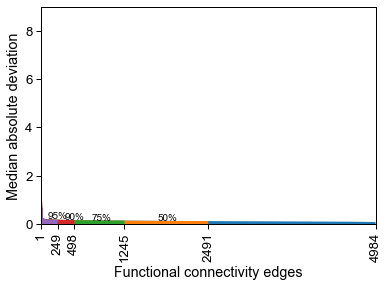

In [6]:
FC_reduction.plot_mad_distroubtion('mad_percentile')

In [7]:
FC_reduction.plot_mad_reduction('references/scorr05_2level_names_100.csv',
                                'FC_mat'                               
                               )

ValueError: shape mismatch: value array of shape (4984,) could not be broadcast to indexing result of shape (4950,)